# 課題9 

In [87]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot  as plt
%matplotlib inline

## Q1.1 多項式による線形回帰
`scikit-learn`モジュールの`PolynomialFeatures`クラスを使うと入力の特徴量から多項や交差項の特徴量を生成することができます。例えば、多項式の次数としてパラメータ`degree`に2を指定すると、1変数の入力$x$に対して、1（バイアス項), $x$, $x^2$、の3つの特徴量を生成します。2変数入力$x_1, x_2$の場合は、1, $x_1$, $x_2$, $x_1^2$, $x_1x_2$, $x_2^2$、の特徴量が生成されます。バイアス項を生成しない場合はパラメータ`include_bias`に`False`を指定します。

[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures)

In [88]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import PolynomialFeatures

iris = load_iris() 
X=(iris['data'][:,2])[:,np.newaxis] 
y=(iris['data'][:,3])[:,np.newaxis] 

print(PolynomialFeatures(degree=2).fit_transform(X))

[[ 1.    1.4   1.96]
 [ 1.    1.4   1.96]
 [ 1.    1.3   1.69]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.7   2.89]
 [ 1.    1.4   1.96]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.5   2.25]
 [ 1.    1.5   2.25]
 [ 1.    1.6   2.56]
 [ 1.    1.4   1.96]
 [ 1.    1.1   1.21]
 [ 1.    1.2   1.44]
 [ 1.    1.5   2.25]
 [ 1.    1.3   1.69]
 [ 1.    1.4   1.96]
 [ 1.    1.7   2.89]
 [ 1.    1.5   2.25]
 [ 1.    1.7   2.89]
 [ 1.    1.5   2.25]
 [ 1.    1.    1.  ]
 [ 1.    1.7   2.89]
 [ 1.    1.9   3.61]
 [ 1.    1.6   2.56]
 [ 1.    1.6   2.56]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.6   2.56]
 [ 1.    1.6   2.56]
 [ 1.    1.5   2.25]
 [ 1.    1.5   2.25]
 [ 1.    1.4   1.96]
 [ 1.    1.5   2.25]
 [ 1.    1.2   1.44]
 [ 1.    1.3   1.69]
 [ 1.    1.5   2.25]
 [ 1.    1.3   1.69]
 [ 1.    1.5   2.25]
 [ 1.    1.3   1.69]
 [ 1.    1.3   1.69]
 [ 1.    1.3   1.69]
 [ 1.    1.6   2.56]
 [ 1.    1.9   3.61]
 [ 1.    1.4   1.96]
 [ 1.    1.6   2.56]
 [ 1.    1.4 

irisデータセットの特徴量petal_lengthとpetal_widthの関係を散布図で可視化すると以下のように2つの特徴量間に関係があることがわかります。以下では、課題8で用いたirisデータセットの特徴量petal_lengthから多項式の特徴量を生成し、それらの特徴量を用いて線形回帰により特徴量petal_widthを予測するモデルを学習しています。

多項式の次数$n$を変化させて、入力（petal_lengthの値）と出力（入力から予測されたpetal_widthの値）の対応がどのように変化するか、特に次数が大きくなり学習モデルが複雑になると訓練データに適合しすぎてしまう過学習が起こることを観察してください。またその際、次数が大きくなると誤差が減少していくことも確認してください。

0.030226004662961103


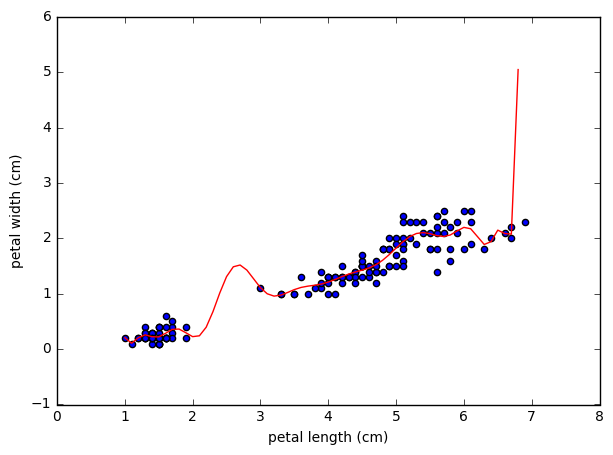

In [89]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

iris = load_iris() 
X=(iris['data'][:,2])[:,np.newaxis] # petal_length
y=(iris['data'][:,3])[:,np.newaxis] # petal_width

# 多項式の次数
n= 30

# 入力からn次多項式の特徴量を生成
poly=PolynomialFeatures(degree=n, include_bias=False)
poly_X=poly.fit_transform(X)

# 訓練データセットへ適合
model=LinearRegression(normalize=True) 
model.fit(poly_X, y) 

# 誤差
y_predicted=model.predict(poly_X) 
print(mean_squared_error(y,y_predicted))

#パラメータ
# print(model.coef_)
# print(model.intercept_)

# 曲線描画用のデータ
X_point=np.arange(X.min(),X.max(),0.1)[:,np.newaxis]
y_point=model.predict(poly.fit_transform(X_point))

plt.figure(figsize=(7,5))
plt.xlabel(iris["feature_names"][2])
plt.ylabel(iris["feature_names"][3])
plt.scatter(poly_X[:,0], y,c='blue')
plt.plot(X_point, y_point, color='red');

## Q1.2 正則化
以下では、学習モデルとして`LinearRegression`の代わりに`Ridge`（リッジ回帰）を使っています。`Ridge`クラスは、$L_2$ノルムを正則化に用いた線形回帰モデルで学習を行うことができます。パラメータ`alpha`に正則化項の係数（講義資料中の$\lambda$）を指定します。

[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

Q1.1で観察した過学習が、正則化により抑えられていることを観察してください。また、正則化項の係数のハイパーパラメータを変化させた時（例えば、0.01, 0.1, 1, 10など）、入力（petal_lengthの値）と出力（入力から予測されたpetal_widthの値）の対応がどのように変化するかその時の誤差の値とともに観察してください。正則化項の係数を大きするとアンダーフィッティングが起こることを確認してください。

0.3088531460387933


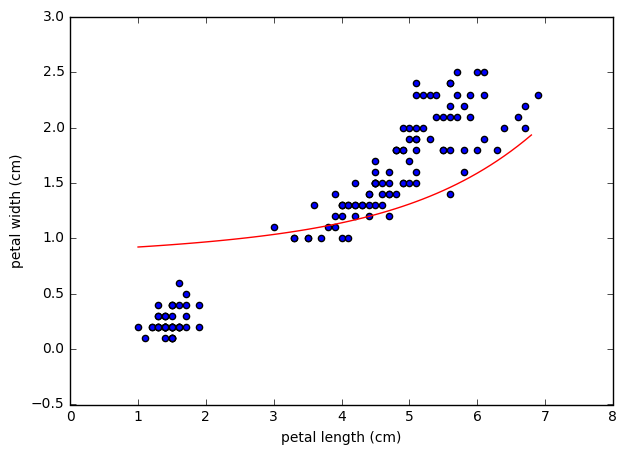

In [90]:
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

iris = load_iris() 
X=(iris['data'][:,2])[:,np.newaxis] 
y=(iris['data'][:,3])[:,np.newaxis] 

# 多項式の次数
n=6

# 入力からn次多項式の特徴量を生成
poly=PolynomialFeatures(degree=n, include_bias=False)
poly_X=poly.fit_transform(X)

# リッジ回帰モデル（aは正則化項の係数）
a= 10
model=Ridge(alpha=a, normalize=True)

# 訓練データセットへ適合
model.fit(poly_X, y) 

# 誤差
y_predicted=model.predict(poly_X) 
print(mean_squared_error(y,y_predicted))

#パラメータ
# print(model.coef_)
# print(model.intercept_)

# 曲線描画用のデータ
X_point=np.arange(X.min(),X.max(),0.1)[:,np.newaxis]
y_point=model.predict(poly.fit_transform(X_point))

plt.figure(figsize=(7,5))
plt.xlabel(iris["feature_names"][2])
plt.ylabel(iris["feature_names"][3])
plt.scatter(poly_X[:,0], y,c='blue')
plt.plot(X_point, y_point, color='red');

## Q2 ロジスティック回帰

irisデータセットの特徴量petal_lengthとpetal_widthで2つの花の種類versicolorかvirginicaのデータを散布図で可視化すると以下のように花ごとにpetal_lengthとpetal_widthの特徴が異なることがわかります。以下では、ロジスティック回帰により2つの特徴量petal_lengthとpetal_widthから2つの花の種類versicolorかvirginicaを予測するような仮説関数のパラメータを学習することを考えます。

まず準備として、特徴量petal_lengthとpetal_widthを入力$X$, 花の種類versicolorかvirginicaを出力（ラベル）$y$とします。入力$X$は各特徴量ごとに標準化し、入力の各データにバイアス項($x_0=1$)を追加するため、入力の先頭列に1を要素とする列ベクトルを挿入します。これにより、入力$X$と出力$y$はデータ数を$m$としてそれぞれ行列（$m \times 3$) とベクトル($m \times 1$)になります。

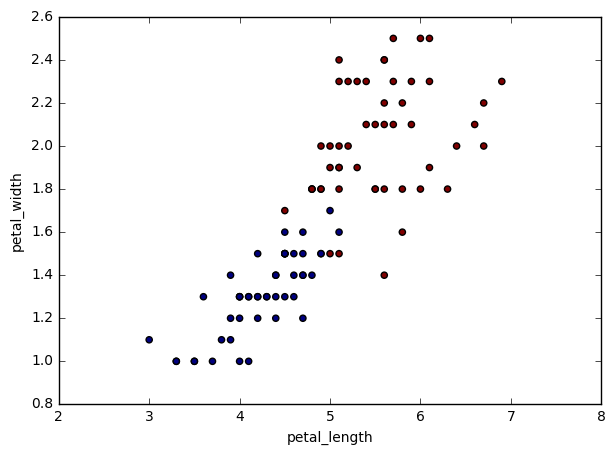

In [91]:
from sklearn.datasets import load_iris
iris = load_iris()
X_all = iris.data[:,[2,3]] # 特徴量petal_lengthとpetal_width
y_all = iris.target
X = X_all[(y_all==1)|(y_all==2)] # 花の種類versicolorかvirginicaに対応する入力
y_label = y_all[(y_all==1)|(y_all==2)]-1 # 花の種類versicolorかvirginica（ラベルを0or1にする）

plt.figure(figsize=(7,5))
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X[:,0], X[:,1], c=y_label);

y=y_label[:,np.newaxis] # 列ベクトルにする
X_norm=(X-np.mean(X, axis=0))/np.std(X, axis=0) # 標準化
X_norm=np.insert(X_norm, 0, np.ones((1,X.shape[0]), dtype=int), axis=1) # バイアス項の追加

### Q2.1 シグモイド関数
シグモイド関数$g(x)$は以下のように定義されます

$g(x)=\frac{1}{1+e^{-x}}$

実数値を要素とする任意のサイズの配列を入力として引数に受け取り、入力の配列の各要素に対するシグモイド関数の値を要素とする入力と同じサイズの配列を返す`sigmoid`関数を完成させてください。

[NumPyの指数関数](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

In [92]:
@np.vectorize
def sigmoid(X):
    return 1 / (1 + np.e**-X)

In [93]:
sigmoid([-1, 0, 1])

array([0.26894142, 0.5       , 0.73105858])

`sigmoid`関数は入力の配列`[-1,0,1]`に対しては、配列`[0.26894142, 0.5, 0.73105858]`を返します。

### Q2.2 最急降下法

以下では、最急降下法を用いて、訓練データセットを元にロジスティック回帰の仮説関数のパラメータを学習する`graddes_logit`関数を実装します。

`graddes_logit`関数では第1引数に入力のデータ行列（データ数($m$)$\times$(特徴量数+バイアス))、第2引数に入力の各データに対する出力（正解）のベクトル（データ数($m$)$\times1$）、第3引数に学習率、第4引数に学習の繰り返し（各繰り返しをエポックと呼ぶ）の回数を受け取ります。

これらの引数を元に、`graddes_logit`関数ではパラメータの学習を行い、エポックごとのコスト関数の値を要素とするリストと最終的なパラメータの値を要素とする配列（(特徴量数+バイアス)$\times1$）を返します。


パラメータを$\theta=(\theta_0, \theta_1, ..., \theta_{n})^T$

仮説関数を$h(x)=g(\theta_0+\theta_1x_1+\theta_2x_2+....+\theta_{n}x_{n})=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}$

入力を$
  X = \left(
    \begin{array}{cccc}
      x_0^{(1)} &   x_1^{(1)} & ... &   x_{n}^{(1)}  \\
      ... & ...& ...&...\\
      x_0^{(m)} &  x_1^{(m)} & ... &   x_{n}^{(m)}  \\
    \end{array}
  \right)
$ 

$X$において$x_0^{(i)}=1$

出力を$y=(y^{(1)}, y^{(2)}, ..., y^{(m)})^T$

とすると、ロジスティック回帰のコスト関数を以下のようにして

$J(\theta)=-\frac{1}{m}\Sigma_{i=1}^{m}(y^{(i)}log(h(x^{(i)}))+(1-y^{(i)})log(1-h(x^{(i)})))$

最急降下法では入力$X$の各特徴量$x_j$に対するパラメータ$\theta_j$を以下の様に更新していきます。

$\theta_j:= \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} =  \theta_j - \frac{\alpha}{m} \Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)}_j)$

パラメータ全体を以下のように一度に更新することもできます。

$\theta := \theta - \frac{\alpha}{m}X^T(g(X\theta)-y)$

入力が1特徴量（変数）の時は、バイアス項に対するパラメータを$\theta_0$、入力変数に対するパラメータを$\theta_1$としてパラメータは以下の様に更新されます。

$\theta_0 := \theta_0 - \frac{\alpha}{m}\Sigma_{i=1}^m (h(x^{(i)})-y^{(i)})$ 

$\theta_1 := \theta_1 - \frac{\alpha}{m}\Sigma_{i=1}^m ((h(x^{(i)})-y^{(i)})x^{(i)})$

具体的に、`graddes_logit`関数では以下の手順によりパラメータの学習を行います。

- 引数`n_iter`で指定されたエポックの回数だけ以下を繰り返す    

     - すべてのm個のデータについて以下を求める
        
        - 入力データ$x^{(i)}$について仮説関数$h(x^{(i)})$の値を求める
        
        - 出力$y^{(i)}$との誤差$h(x^{(i)})-y^{(i)}$の値を求める
    
 - すべてのm個のデータの誤差を用いてコスト関数$ J(\theta)$の値を求め、各エポックのコスト関数の値を要素とするリスト`costs`に追加
 
 - すべてのm個のデータの誤差を用いて各パラメータ$\theta_j (j=0,..,n-1)$を更新し、パラメータの値を要素とする配列`w`を更新
      - `w[0,0]`$:=$($x_0$に対するパラメータ$\theta_0$), `w[1,0]`$:=$($x_1$に対するパラメータ$\theta_1$), ...
        

 
 すべての繰り返しが終了したらリスト`costs`と配列`w`を返す。上記に従って、`graddes_logit`関数を完成させてください。

In [96]:
def graddes_logit(X, y, alpha, n_iter):  
    m = X.shape[0] # データ数
    n =  X.shape[1] # 次元数（特徴量数+1）
    
    costs=[] # エポックごとのコスト関数の値を入れるリスト
    w = np.zeros((n,1)) #  バイアスと各特徴量に対するパラメータ（重み）の初期化
    
    for i in range(n_iter):

        ### コスト関数の計算とパラメータの更新をするコード ###
            # 課題8のgraddes関数と手続きは同じです
            # ロジスティック回帰では仮説関数h(x)がシグモイド関数になっていることに注意してください
        J = 0
        for j in range(m):
            H = sigmoid(np.dot(w.T, X[j].T))
            J += y[j] * np.log(H) + (1-y[i]) * np.log(1-H)
            
        J = J * (-1 / m)
        costs.append(J)
#         print(X.shape)
#         print(w.shape)
#         print(y.shape)
        
        w = w - (alpha / m ) * np.dot(X.T,  (sigmoid(np.dot(X, w)) -  y))
    
        
    return costs, w

`graddes_logit`関数が完成したら以下のセルを実行して動作を確認してください。上記のirisデータセットの特徴量petal_lengthとpetal_lengthを入力データ、それらの花の種類versicolorかvirginicaのラベル（1or0）を出力とした訓練データセットを与え、学習率を0.1、学習のエポック数を100とした時の各エポックごとのコスト関数の値を示しています。パラメータの学習が進むにつれてコスト関数の値が減少していくことがわかります。

また、2つの特徴量、petal_lengthとpetal_width、から2つの花の種類、versicolorかvirginica、を分類するための決定境界を可視化しています。

[0.10400439]
[[0.02318852]
 [1.28885231]
 [1.41169382]]


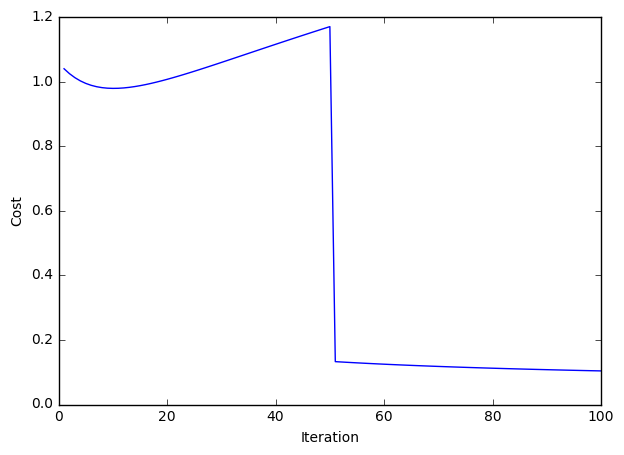

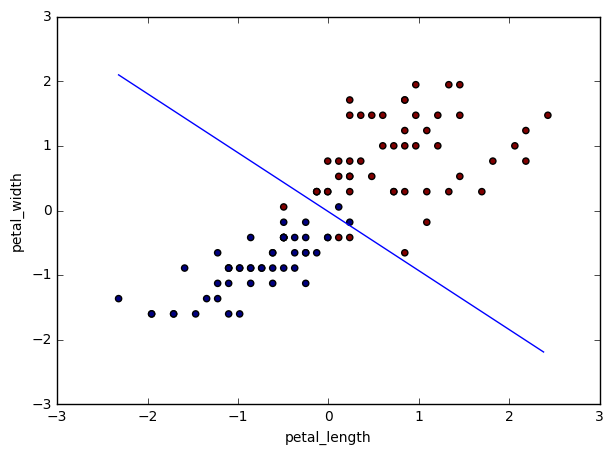

In [97]:
a=0.1 # 学習率
n=100 # 繰り返し回数
costs, w = graddes_logit(X_norm, y, a, n)

# 繰り返しとコスト関数のプロット
print(costs[-1])
plt.figure(figsize=(7,5))
plt.plot(range(1,n+1),costs) 
plt.ylabel('Cost')
plt.xlabel('Iteration');

# 決定境界のプロット
print(w) 
plt.figure(figsize=(7,5))
x1=np.arange(X_norm[:,1].min(),X_norm[:,1].max(),0.1)
plt.plot(x1, -(w[1,0]*x1+w[0,0])/w[2,0])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.scatter(X_norm[:,1], X_norm[:,2],c=y_label);

## 参考：scikit-learnでのロジスティック回帰
以下では、ロジスティック回帰（`LogisticRegression`）クラスをインポートしています。`train_test_split()`はデータセットを訓練データとテストデータに分割するための関数、`accuracy_score()`はモデルの予測精度を評価するための関数です。

上記の課題と同様の特徴量データ（`X`）とラベルデータ（`y`）からなるデータセットを訓練データ（`X_train`, `y_train`）とテストデータ（`X_test`, `y_test`)に分割しています。ここでは、`train_test_split()`関数の`test_size`引数にデータセットの30%をテストデータとすることを指定しています。また、`stratify`引数にラベルデータを指定することで、訓練データとテストデータ、それぞれでラベルの分布が同じになるようにしています。入力の特徴量は`StandardScaler`で標準化しています。

ロジスティック回帰クラスのインスタンスを作成し、`fit()`メソッドによりモデルを訓練データに適合させています。そして、`predict()`メソッドを用いてテストデータのラベルを予測し、`accuracy_score()`関数などで実際のラベルデータ（`y_test`）と比較して予測精度の評価を行なっています。

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.datasets import load_iris

iris = load_iris()
X_all = iris.data[:,[2,3]] 
y_all = iris.target 
X = X_all[(y_all==1)|(y_all==2)] # 入力
y = y_all[(y_all==1)|(y_all==2)] # 出力

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 標準化
sc=StandardScaler() 
sc.fit(X_train)
norm_X_train=sc.transform(X_train) 
norm_X_test=sc.transform(X_test) 

model=LogisticRegression() # ロジスティック回帰モデル
model.fit(norm_X_train, y_train) # モデルを訓練データに適合

# print(model.coef_) # パラメータ重み
# print(model.intercept_) # バイアス重み

y_pred=model.predict(norm_X_test) # テストデータでラベルを予測
# print(model.predict_proba(norm_X_test)) # 各テストデータのラベルが0or1であるかの確率の推定値

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision
print(recall_score(y_test, y_pred)) # recall
print(f1_score(y_test, y_pred))  # f値

[[15  0]
 [ 1 14]]
0.9666666666666667
0.9375
1.0
0.967741935483871
